In [124]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import sys
import json

maxInt = sys.maxsize
filename = 'reportData.csv'

while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

f = open(filename,'r')
reader = csv.reader(f)

models = []
methods = []
calls = []
values = []

for row in reader:
    index = reader.line_num        
    models.append(row[0])
    methods.append(row[1])
    values.append(json.loads(row[2]))
    calls.append(json.loads(row[3]))
f.close()

def getData(name,models,values,calls,methods):
    xdata = []
    ydata = []
    legends = []
    for i in range(len(models)):
        if models[i] == name:
            xdata.append(values[i])
            ydata.append(calls[i])
            legends.append(methods[i])
    return xdata,ydata,legends

def drawPlot(model_selected,logdisplay=True):
    xdata,ydata,legends = getData(model_selected,models,values,calls,methods)
    for i,j in zip(xdata,ydata):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(model_selected)
    plt.legend(['halton','vander','hammersley','sobol','latin'])
    plt.xlabel('Number of evaluations')
    plt.ylabel('Objective value')
    plt.savefig(model_selected+'.png')

def drawPlots(models_selected,logdisplay=True):
    xdata00,ydata00,legends00 = getData(models_selected[0],models,values,calls,methods)
    xdata01,ydata01,legends01 = getData(models_selected[1],models,values,calls,methods)
    xdata10,ydata10,legends10 = getData(models_selected[2],models,values,calls,methods)
    xdata11,ydata11,legends11 = getData(models_selected[3],models,values,calls,methods)

    # index = 0
    # for x,y in zip(xdata10,ydata10):
    #     print(index)
    #     index += 1
    #     plt.plot(y,x,'-.')
    #     if(index>3):
    #         break
    # plt.yscale('log')
    # plt.xscale('log')
    # plt.legend(legends10)
    # plt.show()
    # return

    # fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
    fig, ax = plt.subplots(2, 2)
    fig.text(0.5, 0, 'Number of evaluations', ha='center')
    fig.text(0., 0.5, 'Objective values', va='center', rotation='vertical')
    
    ax[1,0] = plt.subplot(223)
    for i,j in zip(xdata10,ydata10):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[2])

    # ax[0,0] = plt.subplot(221,sharex=ax[1,0])
    ax[0,0] = plt.subplot(221)
    for i,j in zip(xdata00,ydata00):
        plt.plot(j,i,'-.')
    
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[0])
    # plt.setp(ax[0,0].get_xticklabels(), visible=False)

    # ax[1,1] = plt.subplot(224,sharey=ax[1,0])
    ax[1,1] = plt.subplot(224)
    for i,j in zip(xdata11,ydata11):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[3])
    # plt.setp(ax[1,1].get_yticklabels(), visible=False)

    # ax[0,1] = plt.subplot(222,sharex=ax[1,0],sharey=ax[0,0])
    ax[0,1] = plt.subplot(222)
    for i,j in zip(xdata01,ydata01):
        plt.plot(j,i,'-.')
    if logdisplay:
        plt.yscale('log')
        plt.xscale('log')
    plt.title(models_selected[1])
#     plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    # plt.setp(ax[0,1].get_yticklabels(), visible=False)
    # plt.setp(ax[0,1].get_xticklabels(), visible=False)

    line_labels = ['halton','vander','hammersley','sobol','latin']
    fig.legend(labels=line_labels,
               loc='center left', 
               bbox_to_anchor=(0.99, 0.5),
               title="Sampling method",  # Title for the legend
    )

    # Adjust the scaling factor to fit your legend text completely outside the plot
    # (smaller value results in more space being made for the legend)
    # plt.subplots_adjust(right=0.85)
    plt.tight_layout()
    plt.savefig('test.png',bbox_inches = 'tight')

    plt.show()

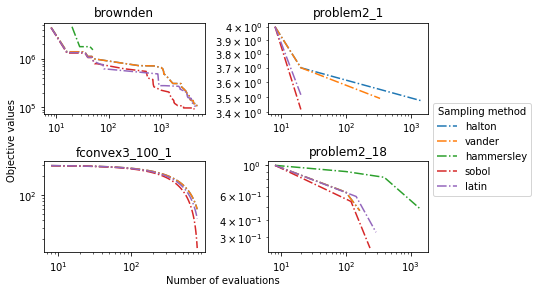

In [125]:
selected_smooth_nonconvex = ['3pk','brownden','biggs3','branin']
selected_nonsmooth_convex = ['problem2_1','problem2_6','problem2_11','problem2_19']
selected_smooth_convex = ['fconvex3_10_1','fconvex3_20_1','fconvex3_100_1','fconvex3_300_1']
selected_nonsmooth_nonconvex = ['problem2_3','problem2_15','problem2_16','problem2_18']

selected = ['brownden','problem2_1','fconvex3_100_1','problem2_18']

drawPlots(selected,logdisplay=True)

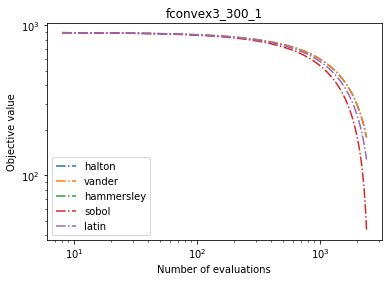

In [122]:
drawPlot('fconvex3_300_1',logdisplay=True)

In [108]:
import json
import csv
import sys
import xlrd
import collections
import numpy as np
import math
import re
import matplotlib.pyplot as plt

def solution(name):
    referenceFile = xlrd.open_workbook('ModelList.xlsx')
    sheet = referenceFile.sheet_by_name('models')
    # index, name, smoothness, convexity, variables, type, solution, library,
    for i in range(sheet.nrows):
        row = sheet.row_values(i)
        if name == row[1]:
            return (float(row[6]), row[2],row[3])
    return None

def mysolution(name):
    reportDataFile = open('reportData.csv','r')
    reportDataReader = csv.reader(reportDataFile)
    solDict = collections.defaultdict(list)
    # name, method, optimals, calls, points
    for line in reportDataReader:
        if line[0] == name:
            # method, optimals, calls
            solDict[name].append((line[1],json.loads(line[2]),json.loads(line[3])))
    reportDataFile.close()
    return solDict

maxInt = sys.maxsize
while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

'''
Main Function
'''
def generateDicts(sample_method):
    modelListFile = open('selected.txt','r')
    numOfModels = 100
    smo_nonconv_resultDict = {} 
    smo_conv_resultDict = {} 
    nonsmo_nonconv_resultDict = {} 
    nonsmo_conv_resultDict = {} 

    for model in modelListFile:
        name = model.strip()
        # Precise solution
        referenceSolution, modelSmoo, modelConv= solution(name)
        # Returned results
        if re.search('convex',name):
            name = 'f'+ name
        if re.search('problem',name):
            name = name.replace('.','_')

        solDict = mysolution(name)

        minVal = math.inf
        for pair in solDict[name]:
            method, values, calls = pair
            if len(values)>0and method==sample_method:
                # minVal = values[-1]
                if modelSmoo == 'smooth' and modelConv == 'nonconvex':
                    smo_nonconv_resultDict[name] = (values[-1],calls[-1],referenceSolution,modelSmoo,modelConv)
                elif modelSmoo == 'smooth' and modelConv == 'convex':
                    smo_conv_resultDict[name] = (values[-1],calls[-1],referenceSolution,modelSmoo,modelConv)
                elif modelSmoo == 'nonsmooth' and modelConv == 'nonconvex':
                    nonsmo_nonconv_resultDict[name] = (values[-1],calls[-1],referenceSolution,modelSmoo,modelConv)
                elif modelSmoo == 'nonsmooth' and modelConv == 'convex':
                    nonsmo_conv_resultDict[name] = (values[-1],calls[-1],referenceSolution,modelSmoo,modelConv)
    modelListFile.close()
    return [smo_conv_resultDict,smo_nonconv_resultDict,nonsmo_nonconv_resultDict,nonsmo_conv_resultDict]

def plot_stats(resultDict):
    numOfCallList = []
    numOfSolvedList = []
    numOfModels = len(resultDict.keys())
    for numOfCall in range(0,5000,100):
        solvedCounter = 0
        for key in resultDict.keys():
            if resultDict[key][1] < numOfCall and np.abs(resultDict[key][0]-resultDict[key][2]<0.01):
                solvedCounter+=1
        numOfCallList.append(numOfCall)
        numOfSolvedList.append(solvedCounter/numOfModels)
    return numOfCallList,numOfSolvedList

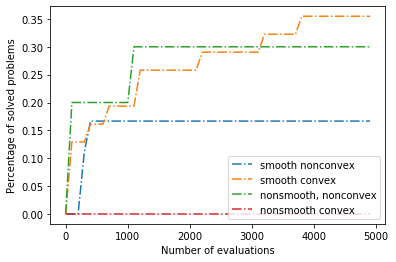

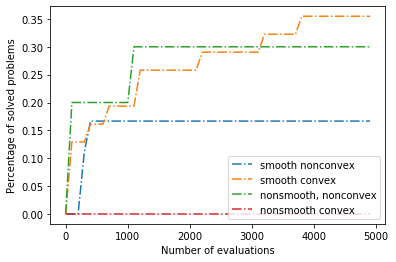

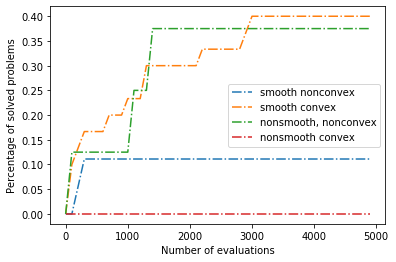

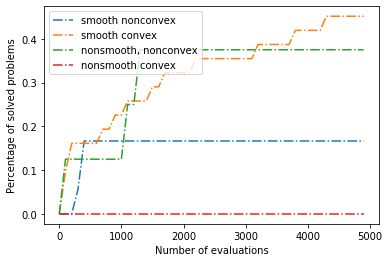

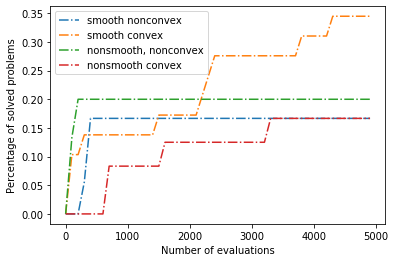

In [111]:
'''
1. smooth nonconvex
2. smooth convex
3. nonsmooth nonconvex
4. nonsmooth convex
'''
methods = ['halton','vander','hammersley','sobol','latin']
# method = 'sobol'
for method in methods:
    dictionaries = generateDicts(method)
    for dic in dictionaries:
        numOfCallList,numOfSolvedList = plot_stats(dic)
        plt.plot(numOfCallList,numOfSolvedList,'-.')
    plt.xlabel('Number of evaluations')
    plt.ylabel('Percentage of solved problems')
    plt.legend(['smooth nonconvex','smooth convex','nonsmooth, nonconvex','nonsmooth convex'])
    plt.savefig(method+'.png')
    plt.show()